# Visualize the findings of verb tense pattern matching

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the DataFrame from a pickle file
with open('../data/PELIC_ASAG_cleaned_matched_vectors.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
df = df.drop(['doc_vector'],axis=1)

In [4]:
# Look at the columns to easily get a list of pattern names
df.columns

Index(['level', 'answer', 'present_simple_active', 'present_simple_active_aux',
       'present_simple_active_modal', 'present_simple_passive',
       'present_simple_passive_modal', 'present_continuous_active',
       'present_continuous_active_modal', 'present_continuous_passive',
       'present_continuous_passive_modal', 'present_perfect_active',
       'present_perfect_active_modal', 'present_perfect_passive',
       'present_perfect_passive_modal', 'present_perfect_continuous_active',
       'present_perfect_continuous_active_modal',
       'present_perfect_continuous_passive',
       'present_perfect_continuous_passive_modal', 'past_simple_active',
       'past_simple_active_aux', 'past_simple_passive',
       'past_continuous_active', 'past_continuous_passive',
       'past_perfect_active', 'past_perfect_passive',
       'past_perfect_continuous_active', 'past_perfect_continuous_passive',
       'will', 'would', 'gerund_subject', 'gerund_pcomp', 'gerund_xcomp',
       'num_sent

In [5]:
patterns = ['present_simple_active', 'present_simple_active_aux',
       'present_simple_active_modal', 'present_simple_passive',
       'present_simple_passive_modal', 'present_continuous_active',
       'present_continuous_active_modal', 'present_continuous_passive',
       'present_continuous_passive_modal', 'present_perfect_active',
       'present_perfect_active_modal', 'present_perfect_passive',
       'present_perfect_passive_modal', 'present_perfect_continuous_active',
       'present_perfect_continuous_active_modal',
       'present_perfect_continuous_passive',
       'present_perfect_continuous_passive_modal', 'past_simple_active',
       'past_simple_active_aux', 'past_simple_passive',
       'past_continuous_active', 'past_continuous_passive',
       'past_perfect_active', 'past_perfect_passive',
       'past_perfect_continuous_active', 'past_perfect_continuous_passive',
       'will', 'would', 'gerund_subject', 'gerund_pcomp', 'gerund_xcomp']

In [6]:
level_2 = df[df.level == 2]
level_2_patterns = level_2[patterns].mean().sort_values(ascending=False)
level_2_patterns_selected = level_2_patterns[level_2_patterns >= 0.1]
level_2_patterns_selected

present_simple_active          2.097453
past_simple_active             0.957918
will                           0.201550
present_continuous_active      0.200443
present_simple_active_modal    0.152824
present_simple_active_aux      0.109635
dtype: float64

In [7]:
level_3 = df[df.level == 3]
level_3_patterns = level_3[patterns].mean().sort_values(ascending=False)
level_3_patterns_selected = level_3_patterns[level_3_patterns >= 0.1]
level_3_patterns_selected

present_simple_active          3.976020
past_simple_active             1.534487
present_simple_active_modal    0.737454
will                           0.384549
present_perfect_active         0.262052
present_continuous_active      0.215946
gerund_pcomp                   0.214339
present_simple_active_aux      0.202101
present_simple_passive         0.110136
dtype: float64

In [8]:
level_4 = df[df.level == 4]
level_4_patterns = level_4[patterns].mean().sort_values(ascending=False)
level_4_patterns_selected = level_4_patterns[level_4_patterns >= 0.1]
level_4_patterns_selected

present_simple_active          7.804579
past_simple_active             2.804906
present_simple_active_modal    1.646116
gerund_pcomp                   0.679722
will                           0.644890
present_continuous_active      0.448814
present_simple_active_aux      0.404497
present_perfect_active         0.355765
present_simple_passive         0.329763
gerund_xcomp                   0.259035
gerund_subject                 0.252576
past_continuous_active         0.204088
would                          0.191006
past_perfect_active            0.147915
past_simple_passive            0.137122
past_simple_active_aux         0.135323
dtype: float64

In [9]:
level_5 = df[df.level == 5]
level_5_patterns = level_5[patterns].mean().sort_values(ascending=False)
level_5_patterns_selected = level_5_patterns[level_5_patterns >= 0.1]
level_5_patterns_selected

present_simple_active           6.953665
past_simple_active              3.262695
present_simple_active_modal     1.515610
gerund_pcomp                    0.728117
will                            0.581110
present_simple_passive          0.495357
present_continuous_active       0.397550
present_perfect_active          0.377198
present_simple_active_aux       0.358131
past_simple_passive             0.304090
would                           0.285418
gerund_subject                  0.232760
gerund_xcomp                    0.226240
past_continuous_active          0.184351
past_perfect_active             0.172298
past_simple_active_aux          0.172002
present_simple_passive_modal    0.168149
dtype: float64

In [10]:
top_features = ['present_simple_active', 'past_simple_active',
       'present_simple_active_modal', 'gerund_pcomp', 'will',
       'present_simple_passive', 'present_continuous_active',
       'present_perfect_active', 'present_simple_active_aux',
       'past_simple_passive', 'would', 'gerund_subject', 'gerund_xcomp',
       'past_continuous_active', 'past_perfect_active',
       'past_simple_active_aux', 'present_simple_passive_modal']

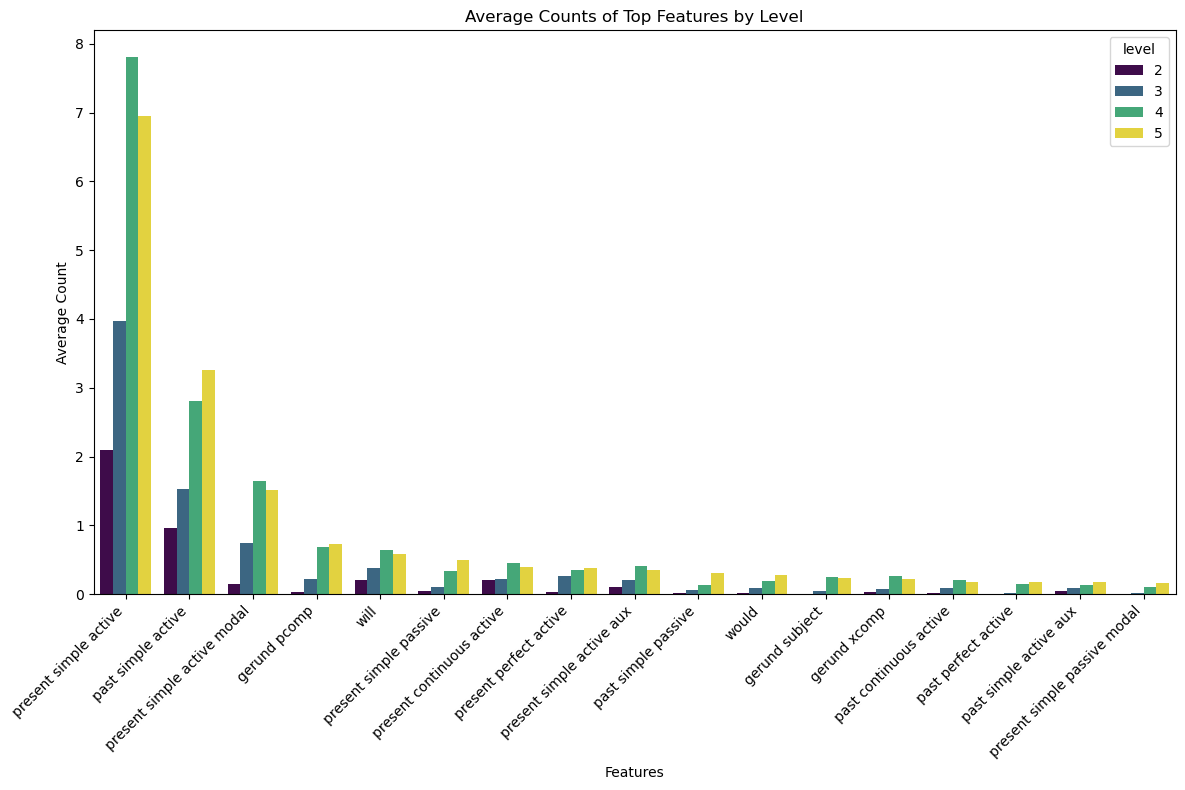

In [11]:
# Calculate average count of each feature for each level
average_counts = df.groupby('level')[top_features].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Average Counts of Top Features by Level')
plt.xlabel('Features')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../artifacts/average_counts_top_features.png')
plt.show()

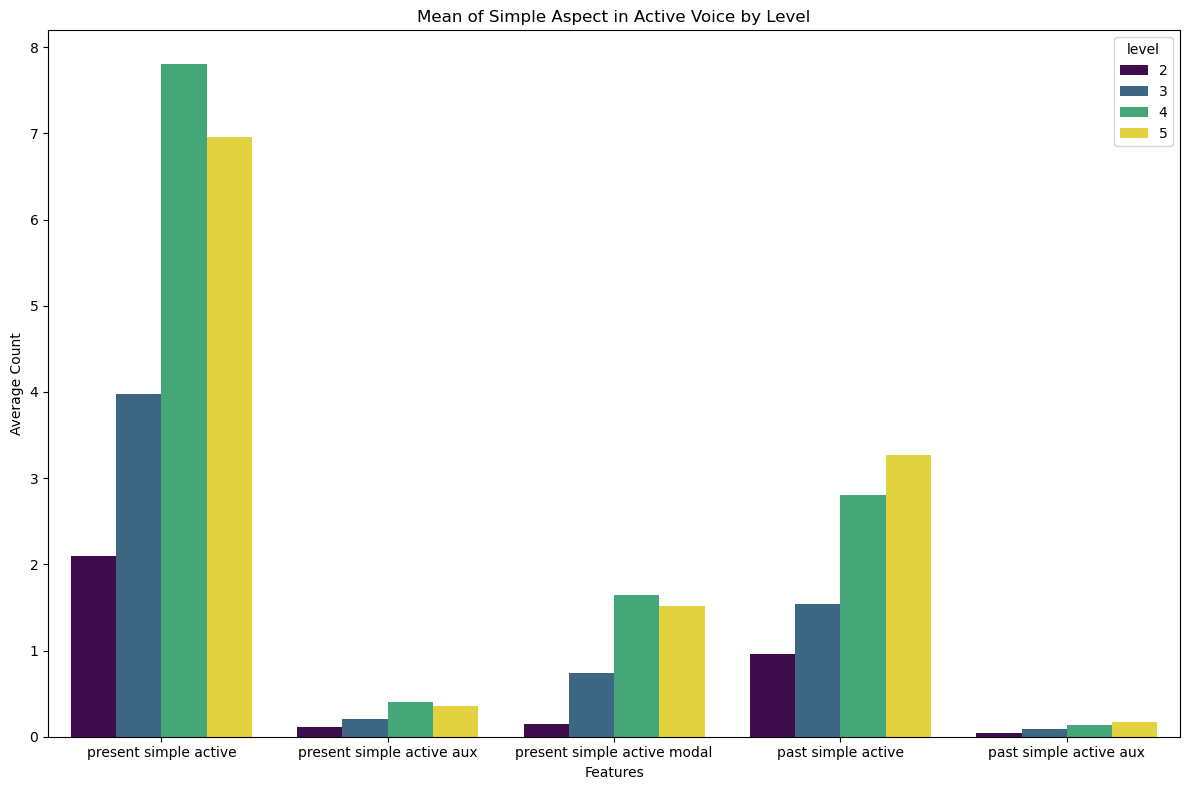

In [12]:
simple_active = ['present_simple_active', 'present_simple_active_aux',
       'present_simple_active_modal', 'past_simple_active',
       'past_simple_active_aux']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[simple_active].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Simple Aspect in Active Voice by Level')
plt.xlabel('Features')
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_simple_active_by_level.png')
plt.show()

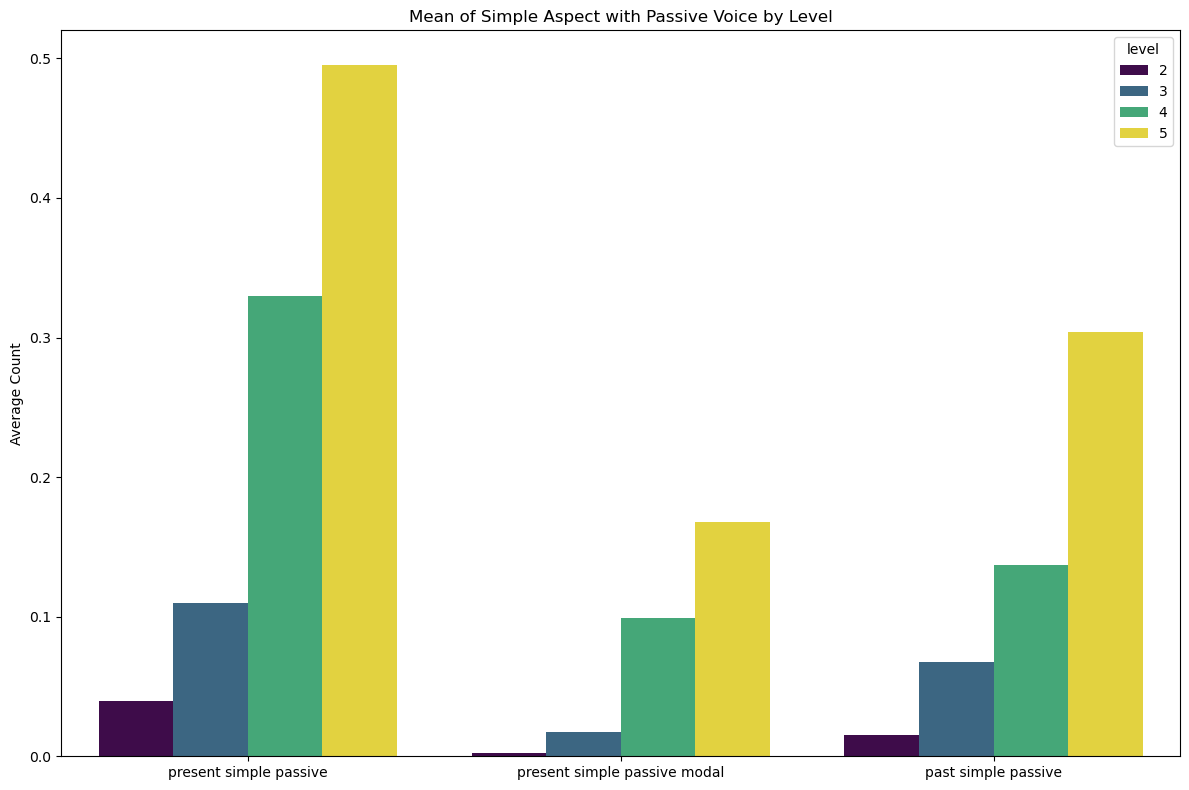

In [13]:
simple_passive = ['present_simple_passive',
       'present_simple_passive_modal', 'past_simple_passive']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[simple_passive].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Simple Aspect with Passive Voice by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_simple_passive_by_level.png')
plt.show()

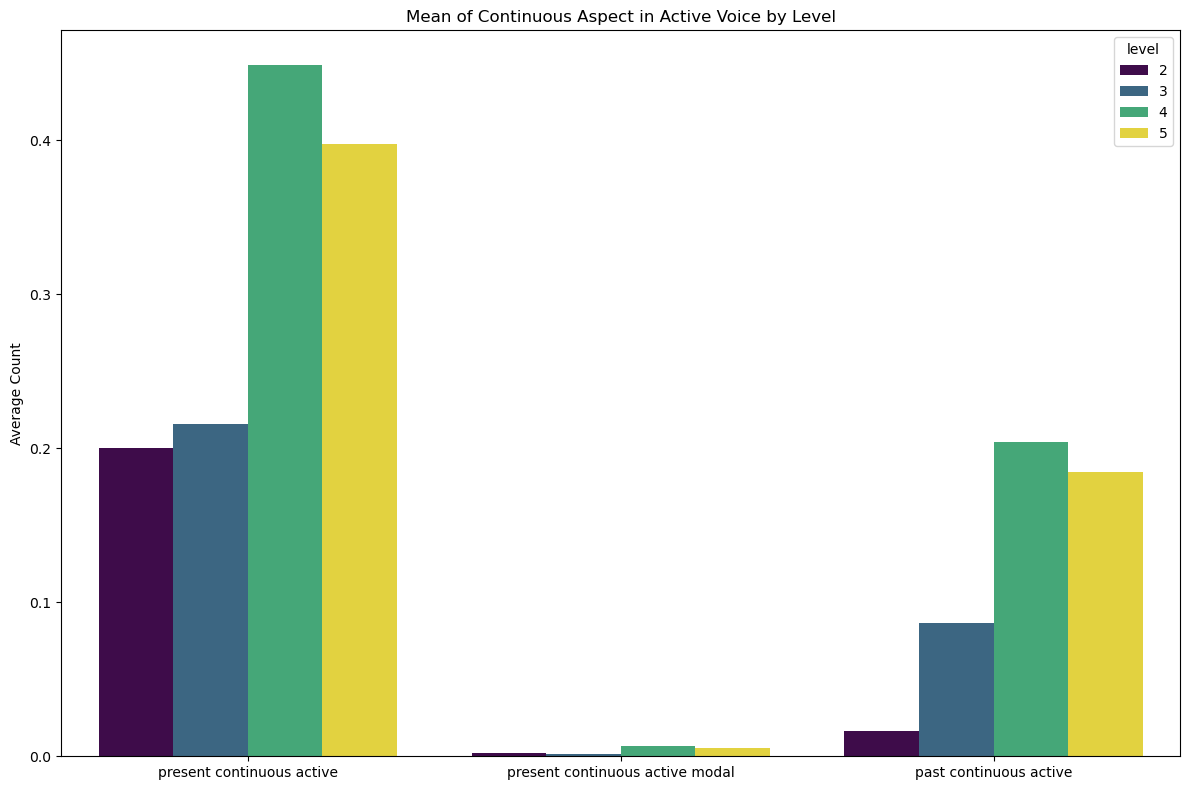

In [14]:
continuous_active = ['present_continuous_active',
       'present_continuous_active_modal',
       'past_continuous_active']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[continuous_active].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Continuous Aspect in Active Voice by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_continuous_active_by_level.png')
plt.show()

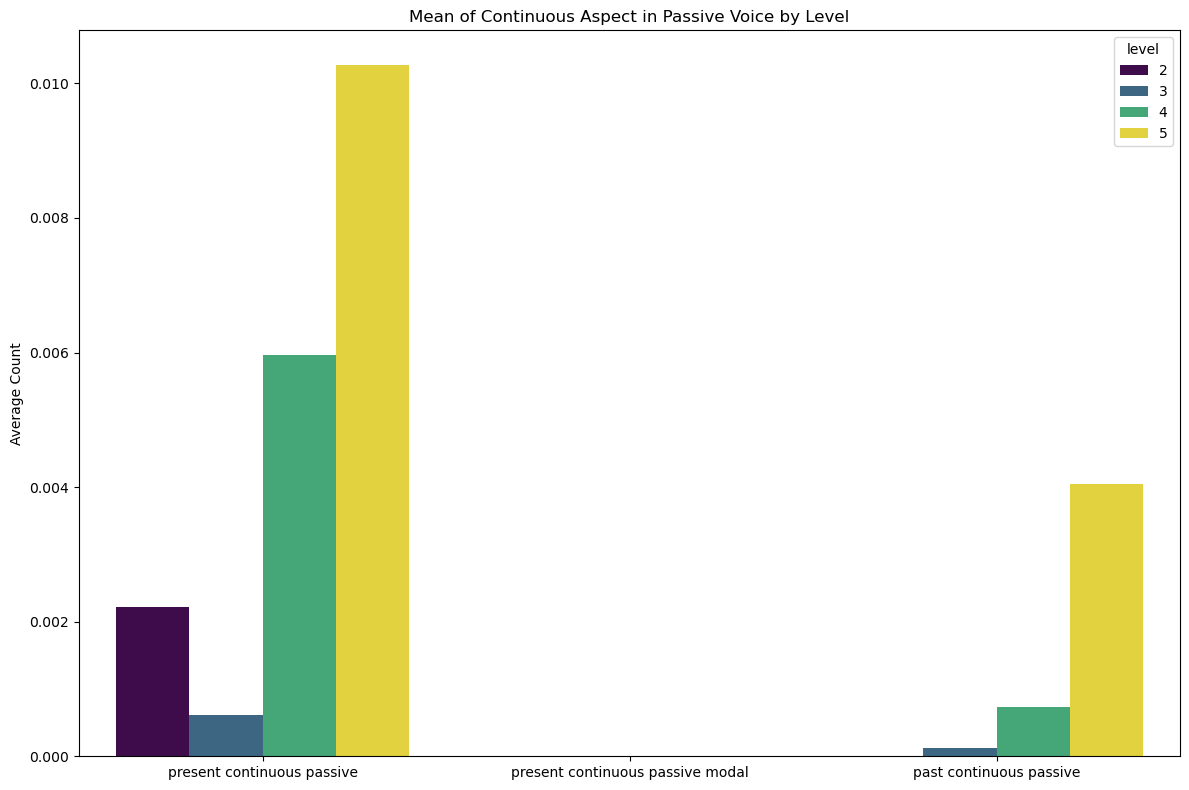

In [15]:
continuous_passive = ['present_continuous_passive',
                      'present_continuous_passive_modal', 'past_continuous_passive']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[continuous_passive].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

# Remove underscores from feature names
average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Continuous Aspect in Passive Voice by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_continuous_passive_by_level.png')
plt.show()

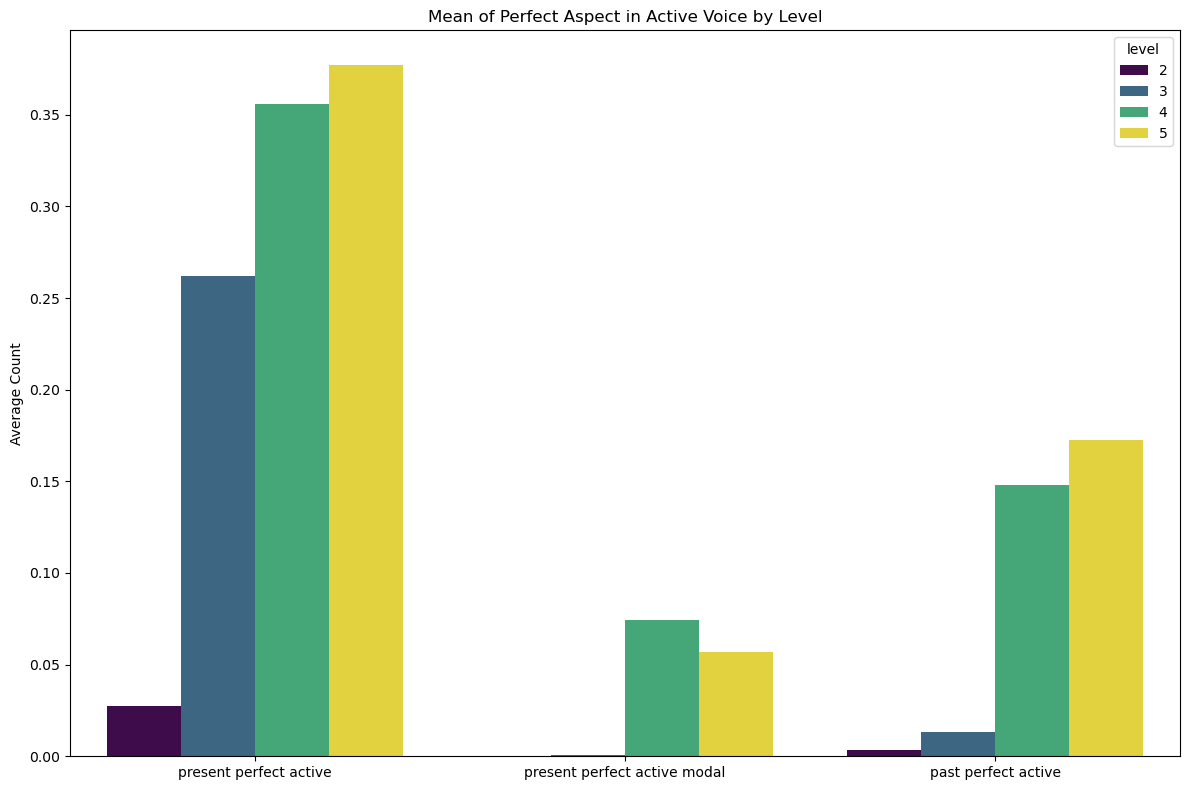

In [16]:
perfect_active = ['present_perfect_active',
       'present_perfect_active_modal',
       'past_perfect_active']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[perfect_active].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

# Remove underscores from feature names
average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Perfect Aspect in Active Voice by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_perfect_active_by_level.png')
plt.show()

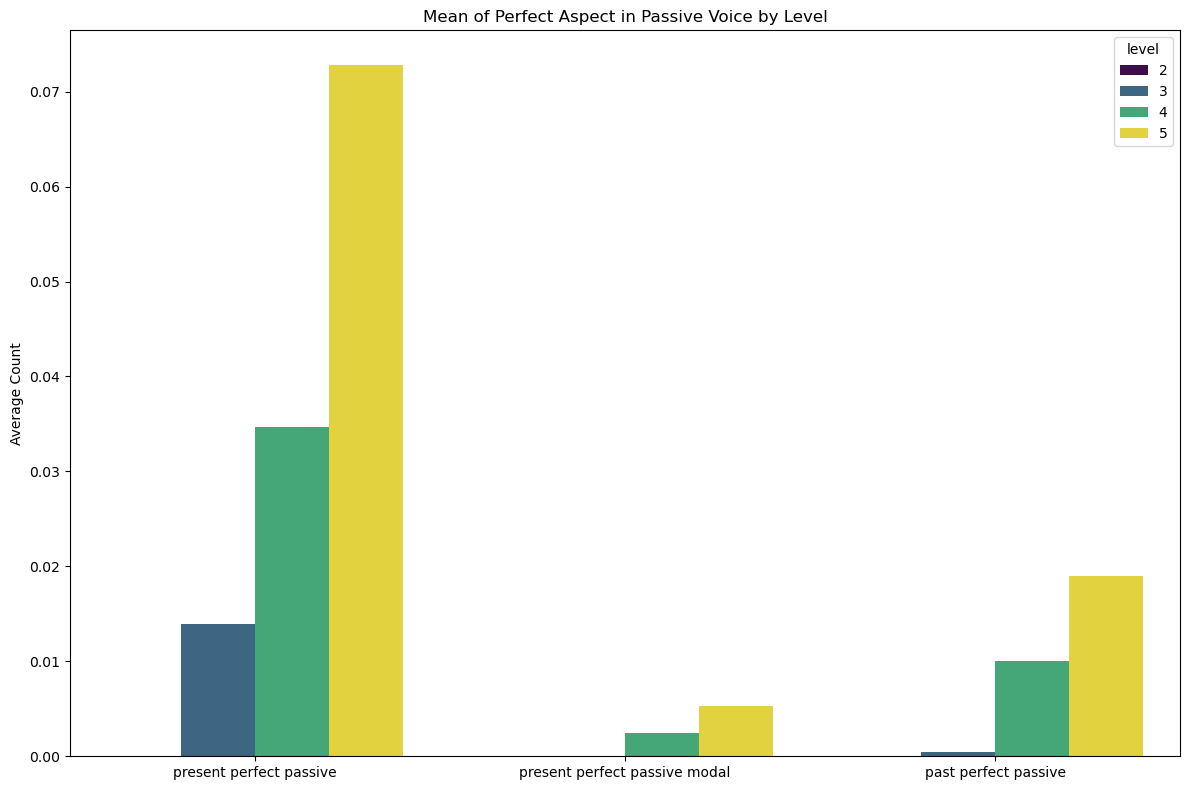

In [17]:
perfect_passive = ['present_perfect_passive',
       'present_perfect_passive_modal', 'past_perfect_passive']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[perfect_passive].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

# Remove underscores from feature names
average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Perfect Aspect in Passive Voice by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_perfect_passive_by_level.png')
plt.show()

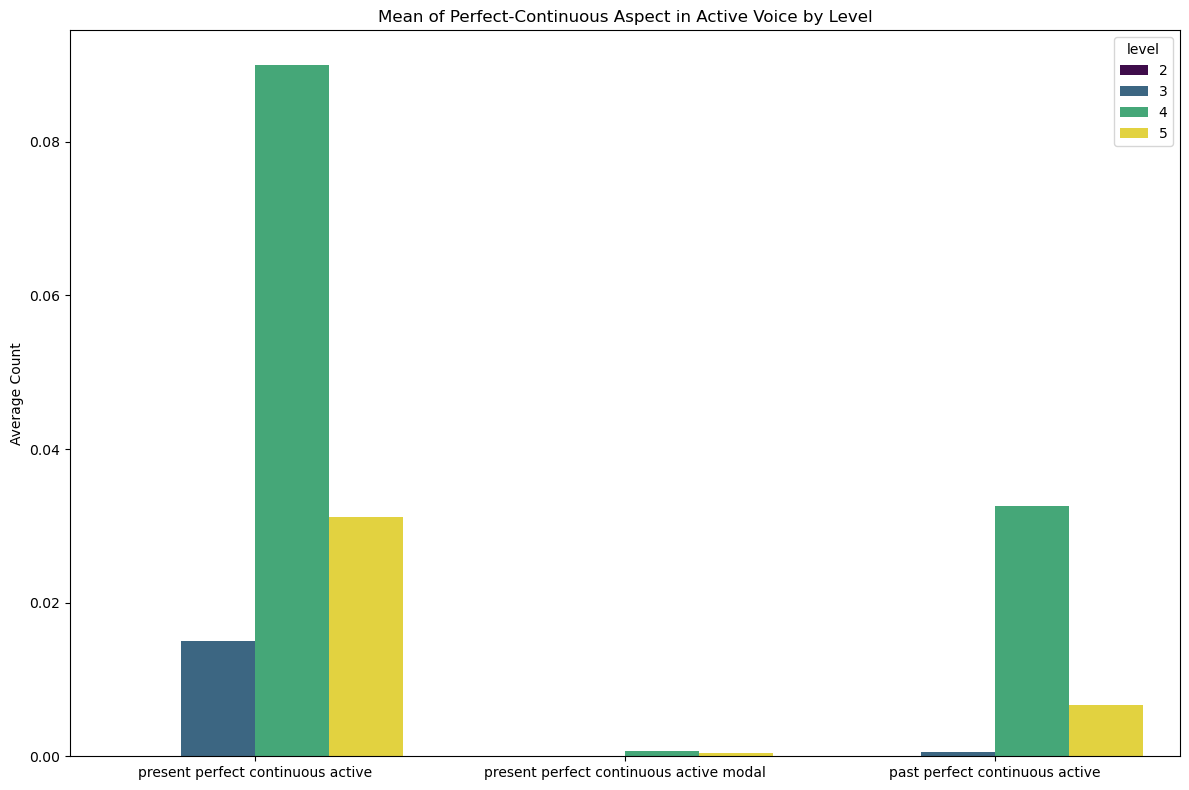

In [18]:
perfect_continuous_active = ['present_perfect_continuous_active',
       'present_perfect_continuous_active_modal',
       'past_perfect_continuous_active']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[perfect_continuous_active].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

# Remove underscores from feature names
average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Perfect-Continuous Aspect in Active Voice by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_perfect_continuous_active_by_level.png')
plt.show()

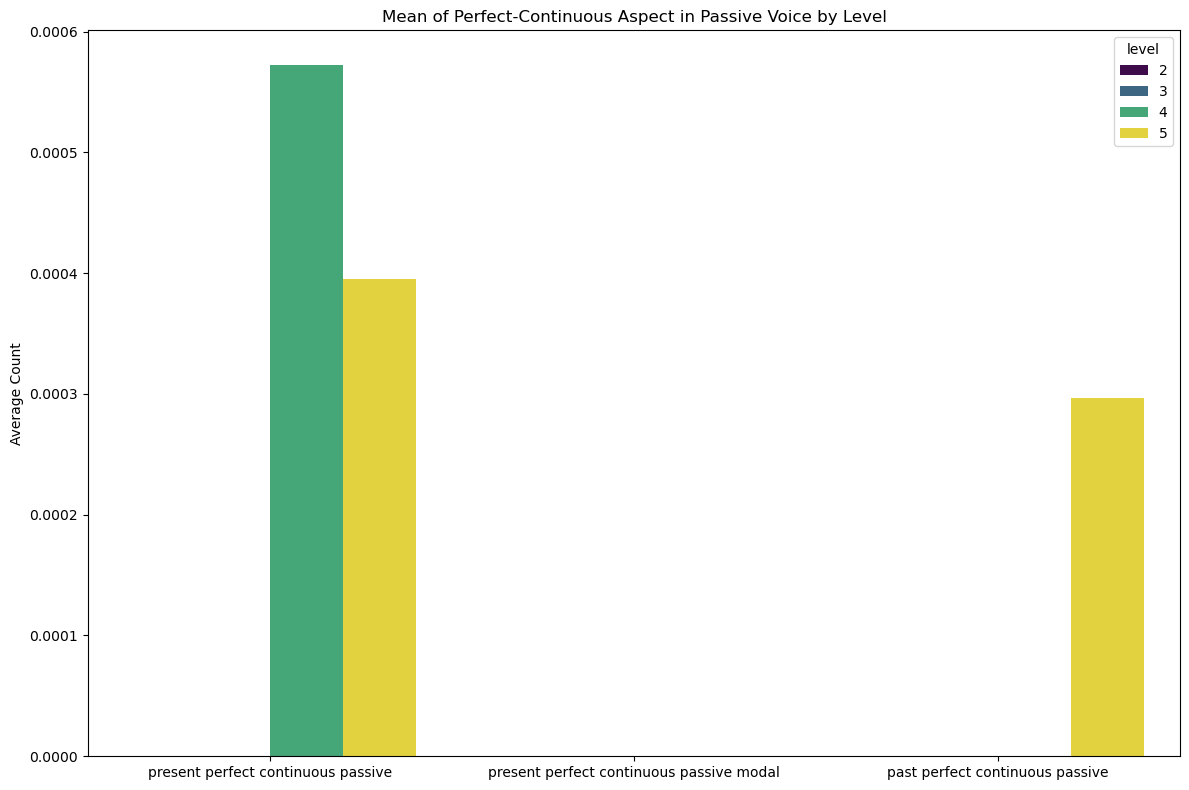

In [19]:
perfect_continuous_passive = ['present_perfect_continuous_passive',
       'present_perfect_continuous_passive_modal', 'past_perfect_continuous_passive']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[perfect_continuous_passive].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

# Remove underscores from feature names
average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Perfect-Continuous Aspect in Passive Voice by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_perfect_continuous_passive_by_level.png')
plt.show()

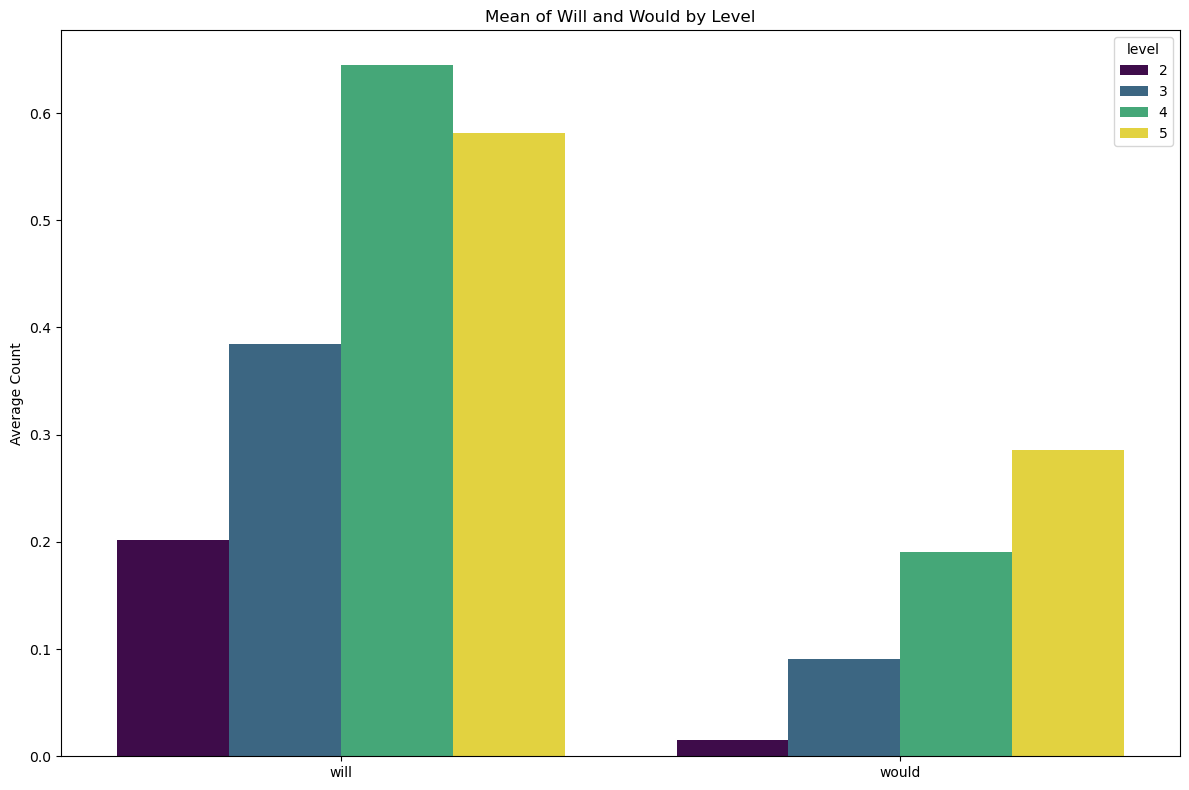

In [20]:
will_would = ['will', 'would']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[will_would].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

# Remove underscores from feature names
average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Will and Would by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_will_would_by_level.png')
plt.show()

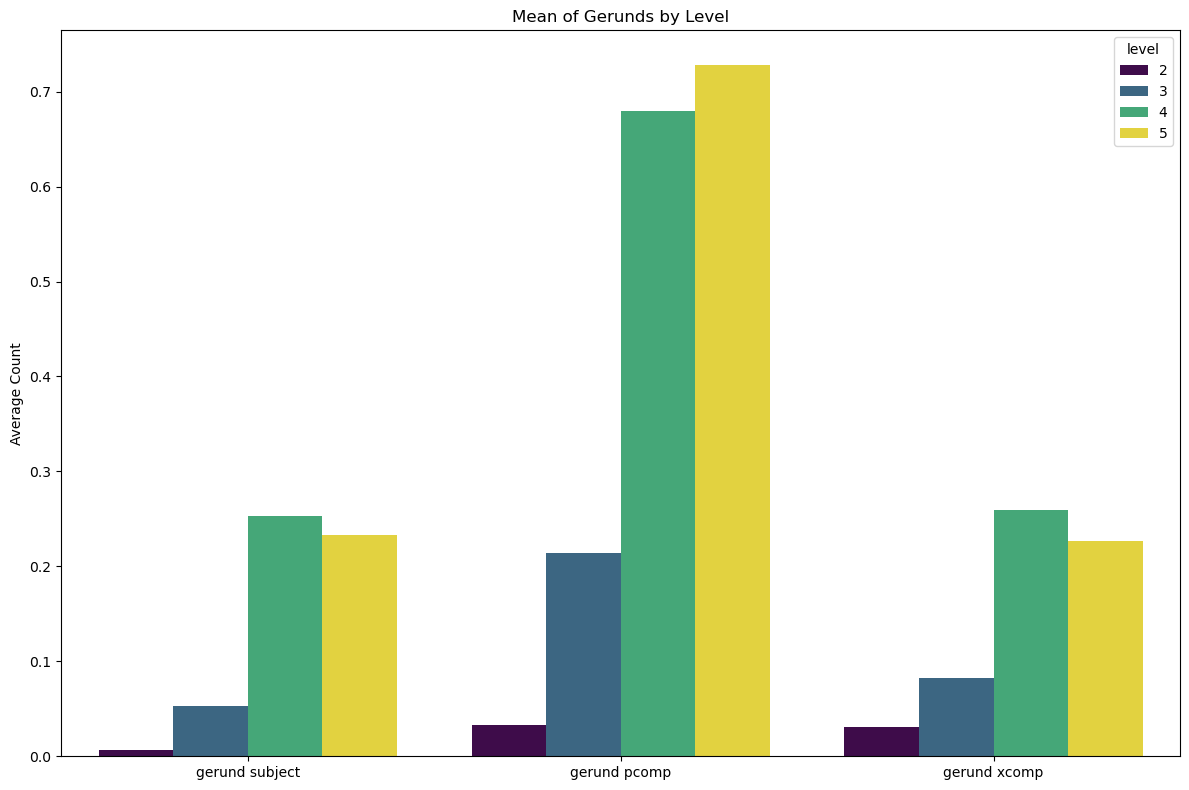

In [21]:
gerunds = ['gerund_subject', 'gerund_pcomp', 'gerund_xcomp']

# Calculate average count of each feature for each level
average_counts = df.groupby('level')[gerunds].mean()

# Reshape the data for plotting
average_counts = average_counts.stack().reset_index()
average_counts.columns = ['level', 'feature', 'average_count']

# Remove underscores from feature names
average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
plt.title('Mean of Gerunds by Level')
plt.xlabel(None)
plt.ylabel('Average Count')
plt.xticks()
plt.tight_layout()
plt.savefig('../artifacts/mean_gerunds_by_level.png')
plt.show()

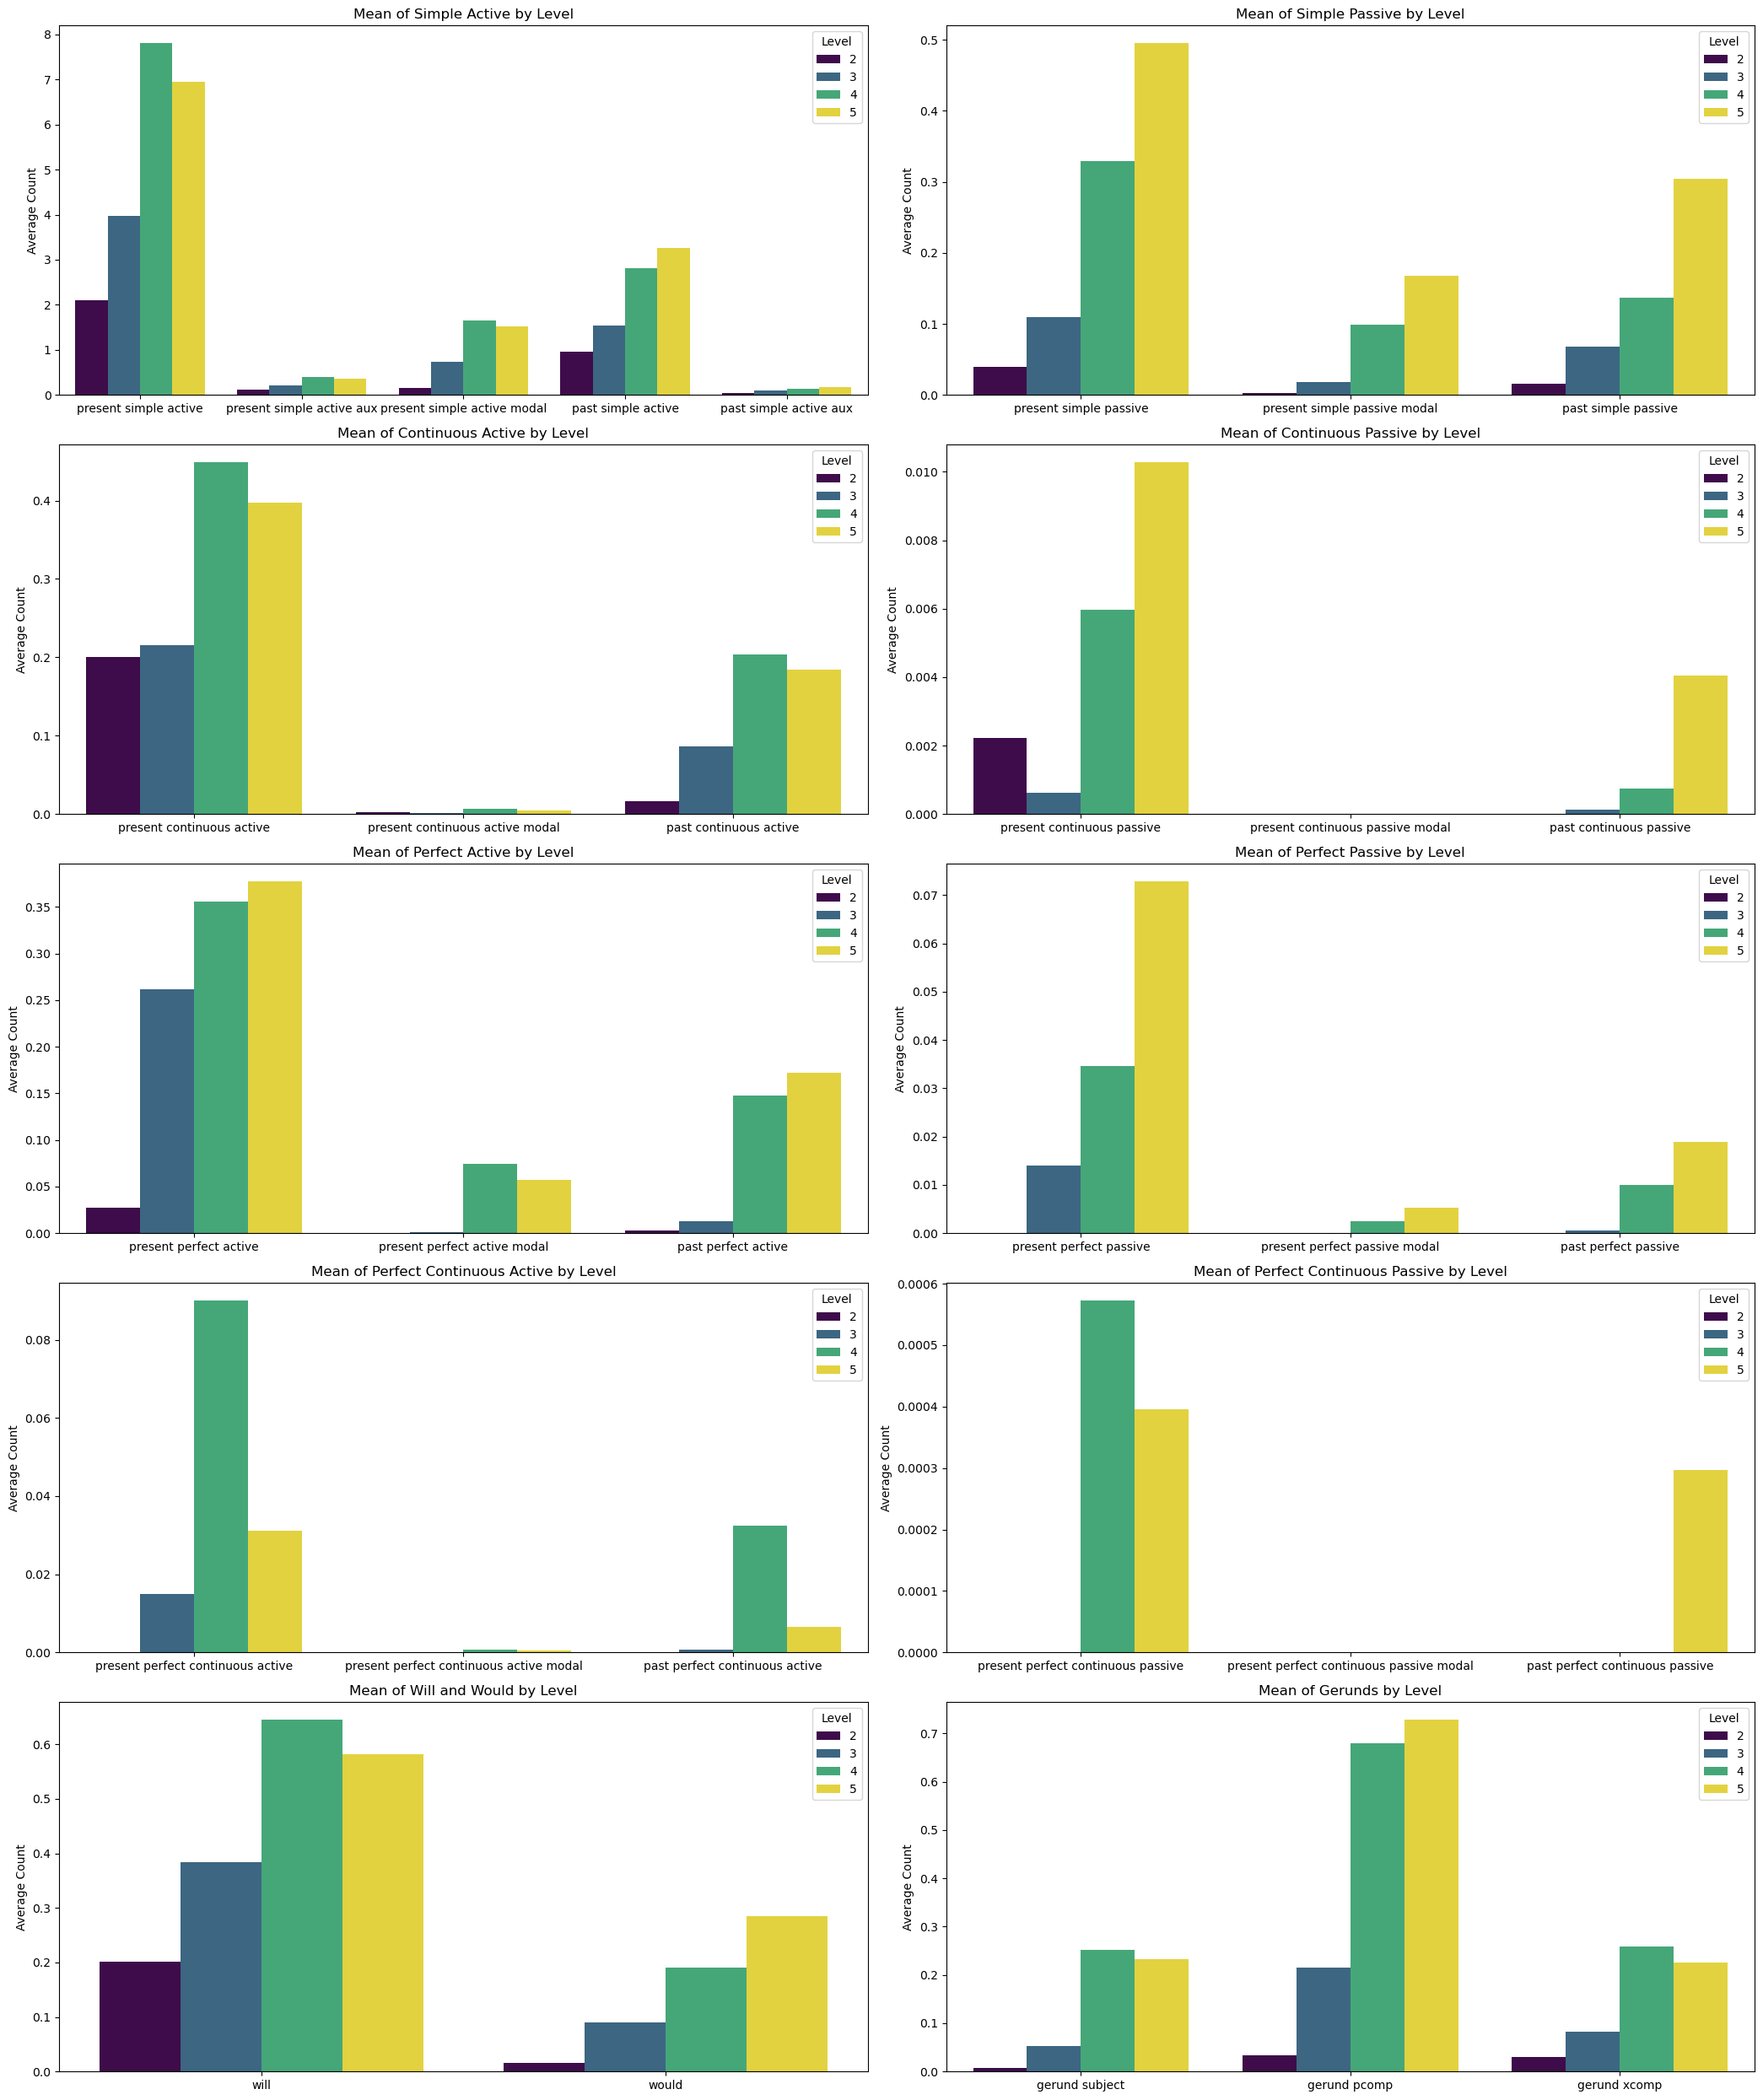

In [22]:
# Define the lists of features
feature_sets = {
    'Simple Active': ['present_simple_active', 'present_simple_active_aux',
                      'present_simple_active_modal', 'past_simple_active',
                      'past_simple_active_aux'],
    'Simple Passive': ['present_simple_passive', 'present_simple_passive_modal',
                       'past_simple_passive'],
    'Continuous Active': ['present_continuous_active', 'present_continuous_active_modal',
                          'past_continuous_active'],
    'Continuous Passive': ['present_continuous_passive', 'present_continuous_passive_modal',
                            'past_continuous_passive'],
    'Perfect Active': ['present_perfect_active', 'present_perfect_active_modal',
                       'past_perfect_active'],
    'Perfect Passive': ['present_perfect_passive', 'present_perfect_passive_modal',
                        'past_perfect_passive'],
    'Perfect Continuous Active': ['present_perfect_continuous_active',
                                  'present_perfect_continuous_active_modal',
                                  'past_perfect_continuous_active'],
    'Perfect Continuous Passive': ['present_perfect_continuous_passive',
                                   'present_perfect_continuous_passive_modal',
                                   'past_perfect_continuous_passive'],
    'Will and Would': ['will', 'would'],
    'Gerunds': ['gerund_subject', 'gerund_pcomp', 'gerund_xcomp']
}

# Create a figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(21, 25))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each feature set and plot
for i, (title, features) in enumerate(feature_sets.items()):
    # Calculate average count of each feature for each level
    average_counts = df.groupby('level')[features].mean()

    # Reshape the data for plotting
    average_counts = average_counts.stack().reset_index()
    average_counts.columns = ['level', 'feature', 'average_count']
    average_counts['feature'] = average_counts['feature'].str.replace('_', ' ')

    # Plot
    sns.barplot(ax=axes[i], x='feature', y='average_count', hue='level', data=average_counts, palette='viridis')
    axes[i].set_title(f'Mean of {title} by Level')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Average Count')
    axes[i].tick_params()
    axes[i].legend(title='Level')

# Remove any extra subplots
for j in range(len(feature_sets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('../artifacts/mean_features_by_level.png')
plt.show()